<a href="https://colab.research.google.com/github/teias-courses/dl99/blob/gh-pages/resources/pandas_sklearn_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas, Excel in Python

Used esources:
* The pandas introduction paper, written by its developer: [pandas: a Foundational Python Library for Data Analysis and Statistics](https://www.dlr.de/sc/portaldata/15/resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf) 
* Pandas docs: [visualization guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Introduction to Numpy and Pandas](https://github.com/guiwitz/NumpyPandas_course).

In [ ]:
import pandas as pd
import numpy as np

## Create a DataFrame

In [ ]:
df = pd.DataFrame({"feat1": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
                   "feat2": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
                   "label": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,feat1,feat2,label
0,foo,one,2
1,foo,one,4
2,foo,one,5
3,foo,two,5
4,foo,two,6
5,bar,one,6
6,bar,one,8
7,bar,two,9
8,bar,two,9


## Load Data from File

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip bank.zip

--2020-11-10 13:51:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K   749KB/s    in 0.8s    

2020-11-10 13:51:39 (749 KB/s) - ‘bank.zip’ saved [579043/579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [ ]:
!head /content/bank.csv

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"
33;"services";"married";"secondary";"no";4789;"yes";"yes";"cellular";11;"may";220;1;339;4;"failure";"no"
35;"management";"single";"tertiary";"no";1350;"yes";"no";"cellular";16;"apr";185;1;330;1;"failure";"no"
30;"management";"married";"tertiary";"no";1476;"yes";"yes";"unknown";3;"jun";199;4;-1;0;"unknown";"no"
59;"blue-collar";"married";"secondary";"no";0;"yes";"no";"unknown";5;"may";226;1;-1;0;"unknown";"no"
35;"management";"single";"tertiary";"no";747;"no";"no";"cellular";23;"feb";141;2;176;3;"failure";"no"
36;"self-employed";"married";"tertiary";"no";307;"yes";"no";"cellular";14;"may";341;1;330;2;"other";"no"
39;"technician";"married";"secondary";"no";147;"yes";"no";"cellular";6;"may";151;2;-1;0;"unknown";"no"
41;"entrepreneur";"marrie

In [ ]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Pivot Tables

In [ ]:
table = pd.pivot_table(df, values=['age', 'balance', 'duration'], 
                       index=['y'],
                       aggfunc=np.mean)
table

,age,balance,duration
y,,,
no,40.998000,1403.211750,226.347500
yes,42.491363,1571.955854,552.742802


In [ ]:
table = pd.pivot_table(df, values=['age', 'balance', 'duration'],
                       index=['y'],
                       aggfunc={'duration': np.mean,
                                'age': [min, max, np.mean],
                                'balance': [np.mean, np.std],
                                })
table

age                       balance                 duration
      max       mean   min         mean          std        mean
y                                                               
no   86.0  40.998000  19.0  1403.211750  3075.349313  226.347500
yes  87.0  42.491363  19.0  1571.955854  2444.398956  552.742802

In [ ]:
table = pd.pivot_table(df, values=['age', 'balance', 'duration'], index=['y', 'marital'],
                       aggfunc={'duration': np.mean,
                                'age': [min, max, np.mean],
                                'balance': [np.mean, np.std],
                                })
table

age                       balance                 duration
               max       mean   min         mean          std        mean
y   marital                                                              
no  divorced  83.0  44.864745  26.0  1060.130820  2193.579229  222.399113
    married   86.0  43.172222  23.0  1443.303571  3272.846159  227.181349
    single    66.0  33.978620  19.0  1455.396501  2894.727029  226.035957
yes divorced  84.0  49.051948  27.0  1487.051948  2215.989246  612.116883
    married   87.0  46.021661  24.0  1644.162455  2279.800064  523.516245
    single    69.0  33.610778  19.0  1491.335329  2794.408258  573.844311

In [ ]:
table = pd.pivot_table(df, values=['age', 'balance'], index=['job'],
                       aggfunc={'age': [np.mean, np.std],
                                'balance': [min, max, np.mean],
                                })
table

age             balance                     
                    mean        std      max         mean     min
job                                                              
admin.         39.682008   9.442496  22171.0  1226.736402  -967.0
blue-collar    40.156448   9.038123  16353.0  1085.161734 -1400.0
entrepreneur   42.011905   8.357999  42045.0  1645.125000 -2082.0
housemaid      47.339286  11.008231  26965.0  2083.803571  -759.0
management     40.540764   9.192424  27359.0  1766.928793 -1746.0
retired        61.869565   9.789507  71188.0  2319.191304 -1206.0
self-employed  41.453552   9.406964  16430.0  1392.409836 -3313.0
services       38.570743   9.207825  26394.0  1103.956835 -1202.0
student        26.821429   5.282754  11555.0  1543.821429  -230.0
technician     39.470052   8.671561  27733.0  1330.996094 -1680.0
unemployed     40.906250   9.765307   9019.0  1089.421875  -872.0
unknown        48.105263  10.399557   7337.0  1501.710526     0.0

## Plotting

See pandas [visualization guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for more examples...

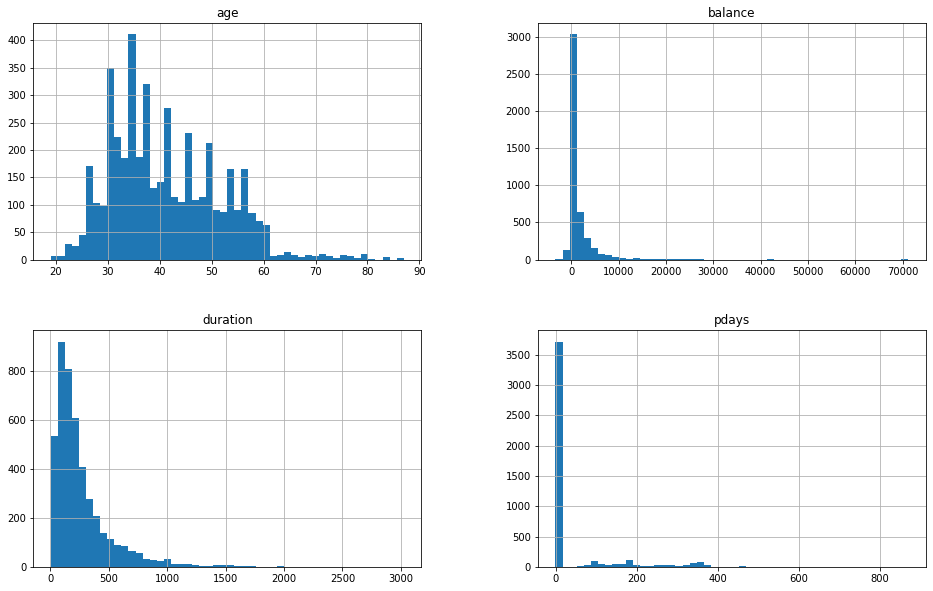

In [ ]:
hist = df[['age', 'balance', 'duration', 'pdays']].hist(bins=50, figsize=[16, 10])

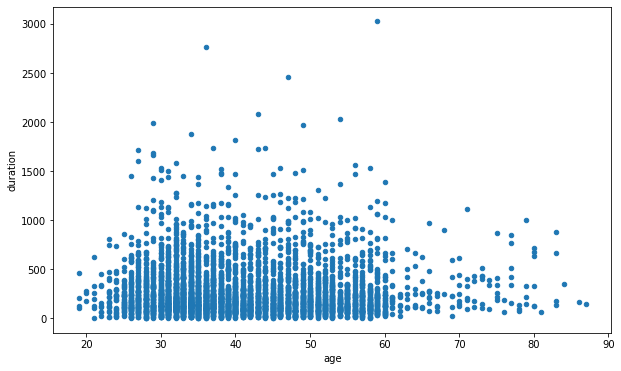

In [ ]:
scatter = df.plot.scatter(x='age', y='duration',
                          figsize=(10, 6))

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


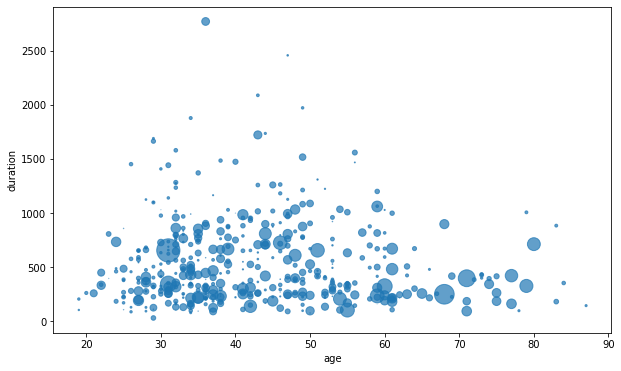

In [ ]:
yes = df[df.y == 'yes']
scatter = yes.plot.scatter(x='age', y='duration',
                          s=yes['balance'] * 0.02, alpha=0.7,
                          figsize=(10, 6))

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


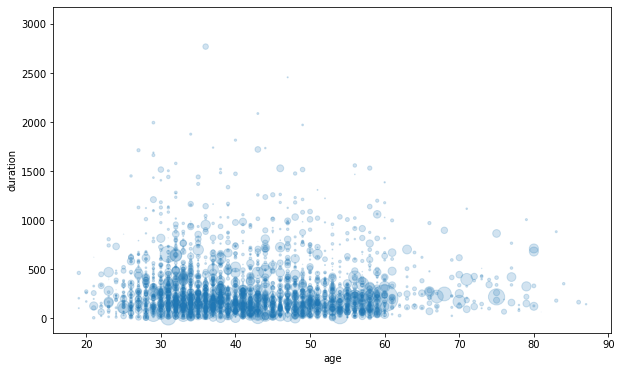

In [ ]:
no = df[df.y == 'no']
scatter = df.plot.scatter(x='age', y='duration',
                          s=df['balance'] * 0.01, alpha=0.2,
                          figsize=(10, 6))

## Accessing Data

Pandas provides two main indexing ways:
* ```df.loc[integer]``` works by position.
* ```df.iloc[value]``` works by value.

```df[val]``` is also used to...

* Select single column or sequence of columns from the DataFrame
* Special case conveniences
>* boolean array (filter rows)
>* slice (slice rows)
>* boolean DataFrame (set values based on some criterion)




In [ ]:
df['age']   # single column

0       30
1       33
2       35
3       30
4       59
        ..
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4521, dtype: int64

In [ ]:
df.age

0       30
1       33
2       35
3       30
4       59
        ..
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4521, dtype: int64

In [ ]:
df[['age', 'balance', 'y']]     # sequence of columns

,age,balance,y
0,30,1787,no
1,33,4789,no
2,35,1350,no
3,30,1476,no
4,59,0,no
...,...,...,...
4516,33,-333,no
4517,57,-3313,no
4518,57,295,no
4519,28,1137,no


In [ ]:
df.loc[7]         # get single row as pandas.Series

age                  39
job          technician
marital         married
education     secondary
default              no
balance             147
housing             yes
loan                 no
contact        cellular
day                   6
month               may
duration            151
campaign              2
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 7, dtype: object

In [ ]:
df.iloc[7] == df.loc[7]     # iloc looks for value 7 in index
                            # while loc returns 7-th row of DataFrame

age          True
job          True
marital      True
education    True
default      True
balance      True
housing      True
loan         True
contact      True
day          True
month        True
duration     True
campaign     True
pdays        True
previous     True
poutcome     True
y            True
Name: 7, dtype: bool

In [ ]:
sorted_df = df.sort_values(by='age', inplace=False) 
sorted_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
503,19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
1900,19,student,single,unknown,no,0,no,no,cellular,11,feb,123,3,-1,0,unknown,no
2780,19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
3233,19,student,single,unknown,no,1169,no,no,cellular,6,feb,463,18,-1,0,unknown,no
999,20,student,single,secondary,no,291,no,no,telephone,11,may,172,5,371,5,failure,no


In [ ]:
sorted_df.loc[7] == sorted_df.iloc[7]

age          False
job          False
marital      False
education     True
default       True
balance      False
housing      False
loan          True
contact      False
day          False
month         True
duration     False
campaign     False
pdays         True
previous      True
poutcome      True
y             True
dtype: bool

In [ ]:
df[:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.loc[2:5]     

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [ ]:
df.loc[2:5, ['age', 'balance', 'y']]

,age,balance,y
2,35,1350,no
3,30,1476,no
4,59,0,no
5,35,747,no


## Filtering Data

In [ ]:
df[df.age < 30].head()     # boolean array

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
18,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
24,26,housemaid,married,tertiary,no,543,no,no,cellular,30,jan,169,3,-1,0,unknown,no
39,23,services,single,tertiary,no,363,yes,no,unknown,30,may,16,18,-1,0,unknown,no
47,26,blue-collar,married,primary,no,0,yes,no,unknown,21,may,425,1,-1,0,unknown,no


In [ ]:
df[(df.age < 30) & (df.y == 'yes')].head()    # complex logical expression

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
80,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,652,1,-1,0,unknown,yes
92,27,services,single,secondary,no,-195,yes,no,cellular,18,may,391,1,-1,0,unknown,yes
110,21,student,single,secondary,no,2488,no,no,cellular,30,jun,258,6,169,3,success,yes
114,25,student,single,secondary,no,331,no,no,telephone,26,aug,170,4,-1,0,unknown,yes


## Manipulating Data

Skipping this part...
* set row/item values
* column operations
* applying custom function to data values


And finaly save data...


In [ ]:
df.to_csv('processed_data.csv')

# Classic Machine Learning with Scikit-Learn

Read More:
* [An introduction to machine learning with scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## Prepare data

In [ ]:
X = df[['age', 'job', 'marital','education', 'balance', 'duration']]
y = df.y

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['age', 'balance', 'duration']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['job', 'marital',	'education']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

## Make Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

## Fit (Train) & Evaluate Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['age', 'balance',
                                                   'duration']),
                                                 ('cat'

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8939226519337017

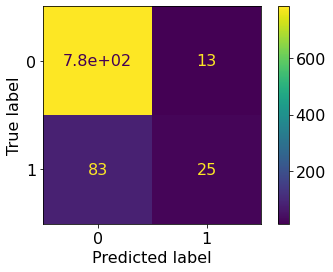

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

plot_confusion_matrix(clf, X_test, y_test)
plt.show()